In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Минипроект

### Задачи
1.	Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем) <br>
2.	Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. <br>
3.	Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56? <br>
4.	Визуализируйте продажи по дням. <br>
5.	Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную  <br>


In [3]:
# 1. Соберите все данные из папки data в один датафрэйм, 
# имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), 
#а также имя пользователя (name),
# и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
columns_name = ['date', 'name', 'product_id', 'quantity']
# Получение дат через названия папок
date = os.listdir('data/4_data/data')
date

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [7]:
# Получение имен через названия папок
name = []
for i in date:
    for j in os.listdir(f'data/4_data/data/{i}'):
        name.append(j)
name = list(set(name))
name

['Vasiliy_Petrov',
 'Petr_Ivanov',
 'Alexey_Petrov',
 'Rostislav_Smirnov',
 'Vasiliy_Ivanov',
 'Petr_Smirnov',
 'Rostislav_Ivanov',
 'Petr_Fedorov',
 'Petr_Petrov',
 'Anton_Smirnov',
 'Kirill_Smirnov',
 'Anton_Ivanov',
 'Rostislav_Petrov',
 'Vasiliy_Fedorov',
 'Kirill_Petrov',
 'Alexey_Fedorov',
 'Alexey_Ivanov',
 'Anton_Petrov',
 'Kirill_Fedorov',
 'Rostislav_Fedorov',
 'Alexey_Smirnov']

In [9]:

data = pd.DataFrame(columns = columns_name)
for cur_date in date:
    for name in os.listdir(f'data/4_data/data/{cur_date}'):
        sample_data = pd.read_csv(f'data/4_data/data/{cur_date}/{name}/data.csv')
        sample_data.insert(0,'date',cur_date)
        sample_data.insert(1,'name',name)
        sample_data = sample_data.loc[:, ~sample_data.columns.str.contains('^Unnamed')]
        data = pd.concat([data,sample_data])
data = data.reset_index().drop(columns=['index'])
data


,date,name,product_id,quantity
0,2020-12-03,Alexey_Smirnov,47,1
1,2020-12-03,Alexey_Smirnov,57,1
2,2020-12-03,Alexey_Smirnov,14,2
3,2020-12-03,Alexey_Smirnov,52,1
4,2020-12-03,Alexey_Smirnov,1,4
...,...,...,...,...
156,2020-12-09,Rostislav_Petrov,66,4
157,2020-12-09,Rostislav_Petrov,39,2
158,2020-12-09,Vasiliy_Ivanov,82,4
159,2020-12-09,Vasiliy_Ivanov,74,2


In [11]:
# 2. Выясните, какой пользователь купил больше всего товаров. 
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
users_quantity = data.groupby('name', as_index = False).quantity.sum() \
                .sort_values('quantity', ascending = False).head()
users_quantity

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [13]:
# Получаем максимальное значение количества покупок
max_quantity = data.groupby('name').quantity.sum().max()
max_quantity

52

In [15]:
# Вычисляем пользователей с максимальным значением покупок
list(users_quantity.query(f'quantity == {max_quantity}').name)

['Alexey_Smirnov', 'Petr_Smirnov']

In [336]:
# 3.Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
# Сколько было продано единиц товара с product_id==56?
top_products = data.groupby('product_id', as_index = False).quantity.sum() \
                .sort_values('quantity', ascending = False).head(10)
top_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [342]:
# Сколько раз купили продукт с id == 56
top_products.loc[top_products.product_id == 56].quantity

42    18
Name: quantity, dtype: object

Text(0.5, 1.0, 'Топ-10 покупаемых товаров')

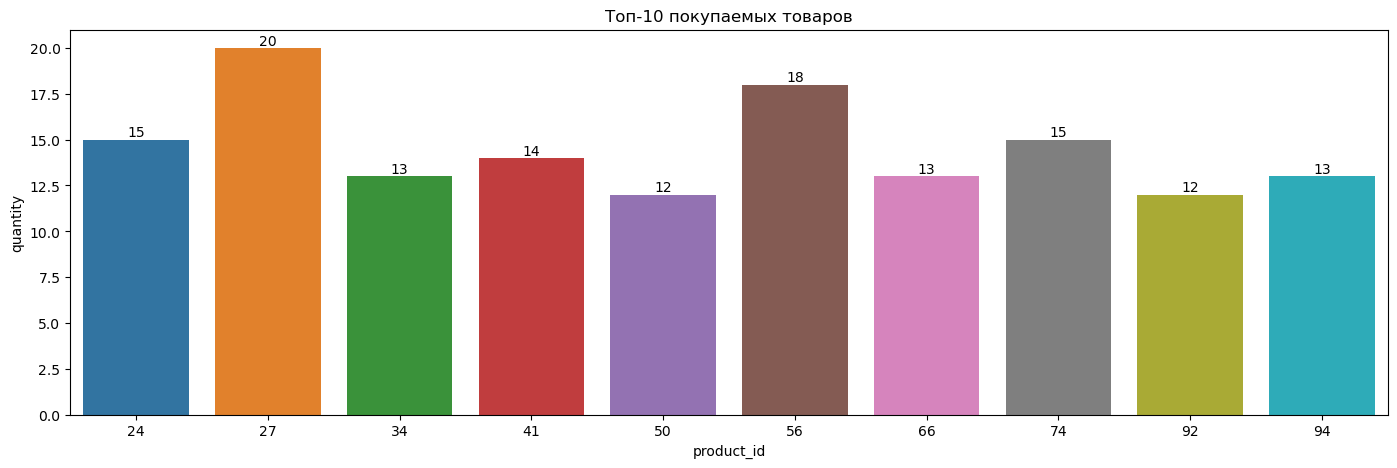

In [376]:
fig,ax = plt.subplots(figsize=(17,5))
sns.barplot(x = top_products['product_id'], y = top_products['quantity'], ax = ax)
ax.bar_label(ax.containers[0])
ax.set_title('Топ-10 покупаемых товаров')

In [380]:
# 4. Визуализируйте продажи по дням
quantity_date = data.groupby('date', as_index = False).agg({'quantity':'sum'})
quantity_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Text(0.5, 1.0, 'Покупки по дням')

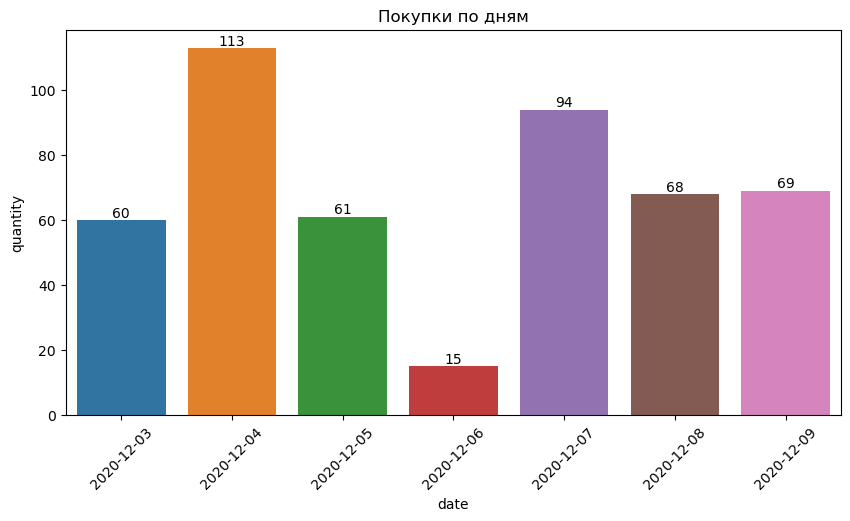

In [390]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data = quantity_date, x = 'date', y = 'quantity', ax=ax,
           order = quantity_date.date)
ax.bar_label(ax.containers[0])
ax.tick_params(axis = 'x', rotation = 45)
ax.set_title('Покупки по дням')

In [392]:
# 5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
print(len(data))

161


In [394]:
data = data.drop_duplicates(subset=['date','name','product_id'])
print(len(data))

160


In [404]:
data.query('name == "Anton_Ivanov"')

,date,name,product_id,quantity
96,2020-12-07,Anton_Ivanov,15,4
143,2020-12-09,Anton_Ivanov,92,4
144,2020-12-09,Anton_Ivanov,88,3
145,2020-12-09,Anton_Ivanov,24,5
146,2020-12-09,Anton_Ivanov,36,1
147,2020-12-09,Anton_Ivanov,15,3
148,2020-12-09,Anton_Ivanov,90,3


In [420]:
data.groupby(['name','product_id'],as_index = False) \
            .quantity.count() \
            .query('quantity >= 2')

,name,product_id,quantity
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [422]:
data.groupby(['name','product_id'],as_index = False).quantity.count() \
            .query('quantity >= 2').name.unique()

array(['Anton_Ivanov', 'Petr_Fedorov'], dtype=object)

# Дополнительное задание

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn. <br>
•	inn.xls — таблица в экселевском формате <br> 
•	necessary_inn.txt — перечень необходимых ИНН в текстовом формате <br>
Задачи: <br>
•	извлечь из таблицы записи с ИНН, указанными в текстовом файле <br>
•	записать результат в файл selected_inn.csv <br>


In [17]:
inn_txt_path = "data/4_necessary_inn.txt"
inn_txt_data = [int(value[0:-1]) for value in open(inn_txt_path).readlines()]
inn_txt_data

[394609645484,
 281578625230,
 923769811917,
 998694734508,
 271011690615,
 924952812367,
 646685244561,
 581531230312,
 841967395801,
 962179889311,
 873191383820,
 590538076039,
 194319975048,
 614658394086,
 571270160555,
 609400911893,
 595260069852,
 706966142477,
 173050718969,
 968048428696,
 806967744814,
 575198252501,
 283081417246,
 663119569897,
 600958529354,
 280452832937,
 415557497037,
 195142638722,
 472181033836,
 722903871682,
 442387408954,
 196518820495,
 653798670054,
 126259856639,
 175482780898,
 192518356612,
 817648134701,
 321724220657,
 864970037680,
 822991191528,
 205472219644,
 532801459453,
 657038381012,
 197916669463,
 849814898285,
 617082656257,
 500480544925,
 765833725639,
 263518962896,
 415856290529,
 812729265571,
 688172366656,
 837771137752,
 456294893364,
 668157292633,
 491435460276,
 323896131459,
 664667769879,
 293128896936,
 833493884251,
 120708914823,
 860475372268,
 172328288163,
 452188261986,
 818829342640,
 948029225406,
 310163740

In [19]:
inn_xls_data = pd.read_excel("data/4_inn.xls", index_col = 1)
inn_xls_data = inn_xls_data.drop(columns = "Unnamed: 0")
inn_xls_data.head()

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
#,,,,,,,,,,,,,,,,,,
0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [117]:
data = inn_xls_data.loc[inn_xls_data.head_inn.isin(inn_txt_data)]
data.shape

(114, 18)

In [21]:
data.to_csv("res.csv")